# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

In [107]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [109]:
df=pd.read_csv('Traffic Data.csv')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [110]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [111]:
# Handle missing values
df['traffic_volume'] = df['traffic_volume'].fillna(method='ffill')

<ipython-input-111-5aa1ceb02cd5>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['traffic_volume'] = df['traffic_volume'].fillna(method='ffill')


In [112]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [113]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19995,False
19996,False
19997,False
19998,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       20000 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [115]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,20000.00000,20000.000000,20000.000000,20000.0,20000.000000
mean,3277.60735,281.162680,0.048396,0.0,49.384600
std,1977.09155,12.661288,0.398007,0.0,39.647341
min,113.00000,243.390000,0.000000,0.0,0.000000
25%,1228.00000,271.950000,0.000000,0.0,1.000000
50%,3427.00000,281.825000,0.000000,0.0,75.000000
75%,4927.00000,291.840000,0.000000,0.0,90.000000
max,16781.00000,310.070000,10.600000,0.0,92.000000


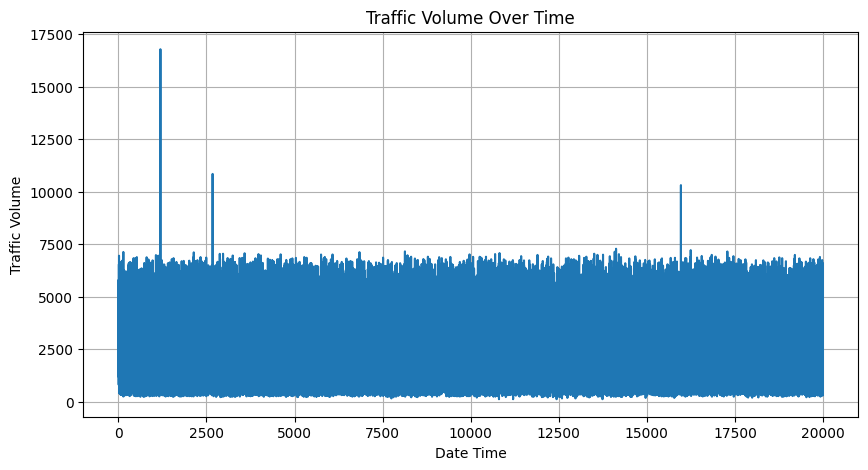

In [121]:
# Plot time series data
plt.figure(figsize=(10, 5))
plt.plot(df['traffic_volume'])
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.grid(True)
plt.show()

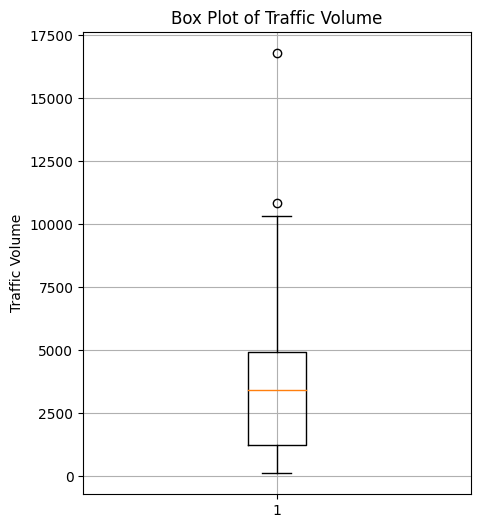

In [122]:
# Box plot for outlier detection
plt.figure(figsize=(5, 6))
plt.boxplot(df['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.title('Box Plot of Traffic Volume')
plt.grid(True)
plt.show()

In [123]:
# Seasonal decomposition
result = seasonal_decompose(df['traffic_volume'], model='additive', period=24)

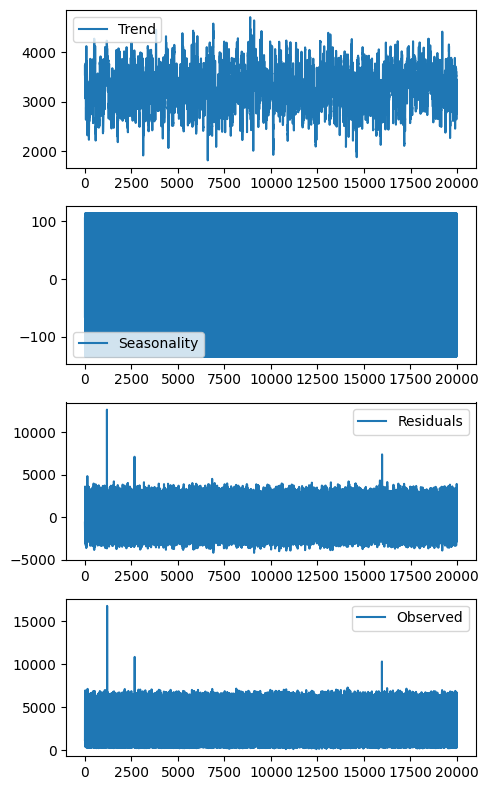

In [124]:
# Plot the decomposed components
plt.figure(figsize=(5, 8))
plt.subplot(411)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.observed, label='Observed')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [125]:
# Lagged traffic volume
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)

In [126]:
# Sort dates
df.set_index('date_time', inplace=True)

In [127]:
# Handle missing values
df['traffic_volume_lag1'] = df['traffic_volume_lag1'].fillna(method='bfill')
df

<ipython-input-127-80c4f5955997>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['traffic_volume_lag1'] = df['traffic_volume_lag1'].fillna(method='bfill')


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1
date_time,,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist,1209.0
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,1209.0
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,1248.0
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,4602.0
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2838.0
...,...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,6601.0
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2723.0
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,5895.0


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [128]:
# Shift method for previous day's traffic volume
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)

In [129]:
# Difference between traffic volume values
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [132]:
# Convert the index to DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

In [133]:
# Extract date features
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

In [240]:
print(df.columns)


Index(['traffic_volume', 'traffic_volume_lag1', 'prev_traffic_volume',
       'traffic_volume_diff', 'day_of_week', 'month', 'day_of_year'],
      dtype='object')


In [245]:
# Handle missing values
df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(method='bfill')
df['traffic_volume_diff'] = df['traffic_volume_diff'].fillna(method='bfill')
df['day_of_week'] = df['day_of_week'].fillna(method='bfill')
df['month'] = df['month'].fillna(method='bfill')
df['day_of_year'] = df['day_of_year'].fillna(method='bfill')
df

<ipython-input-245-d841bd4d2bf5>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(method='bfill')
<ipython-input-245-d841bd4d2bf5>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['traffic_volume_diff'] = df['traffic_volume_diff'].fillna(method='bfill')
<ipython-input-245-d841bd4d2bf5>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['day_of_week'] = df['day_of_week'].fillna(method='bfill')
<ipython-input-245-d841bd4d2bf5>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['month'] = df['month'].fillna(method='bfill')
<ipython-input-245-d841bd4d2bf5>:6: FutureWarning: S

,traffic_volume,traffic_volume_lag1,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,3403.0,894.0,1469.0,4,11,323
2016-11-18 15:00:00,4872.0,3253.0,980.0,1619.0,4,11,323
2016-11-18 15:00:00,4872.0,6038.0,4348.0,-1166.0,4,11,323
2016-11-18 16:00:00,5074.0,2453.0,3821.0,2621.0,4,11,323
2016-11-18 16:00:00,5074.0,3071.0,3658.0,2003.0,4,11,323
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,4457.0,5270.0,-914.0,6,9,273
2018-09-30 20:00:00,2781.0,519.0,4749.0,2262.0,6,9,273
2018-09-30 21:00:00,2159.0,6146.0,4332.0,-3987.0,6,9,273


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [246]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)  # Sort the DataFrame by the index

# Check if the dates is in index
print(df.index)

train = df.loc['2017-08-27':'2017-11-09']  # 3 month for training
val = df.loc['2017-11-10':'2017-12-31']  # 2 month for val
test = df.loc['2018-01-01':'2018-09-30']  # 9 month for test

DatetimeIndex(['2016-11-18 15:00:00', '2016-11-18 15:00:00',
               '2016-11-18 15:00:00', '2016-11-18 16:00:00',
               '2016-11-18 16:00:00', '2016-11-18 16:00:00',
               '2016-11-18 17:00:00', '2016-11-18 17:00:00',
               '2016-11-18 17:00:00', '2016-11-18 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=20000, freq=None)


In [247]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train_pre = scaler.transform(train)
val_pre = scaler.transform(val)
test_pre = scaler.transform(test) #test - min_train/ max_train-min_train

In [248]:
for x,y in val_Xy:
  print(x.numpy(),y.numpy())

Streaming output truncated to the last 5000 lines.
 [ 5.515e+03  3.716e+03  3.237e+03  1.799e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 6.326e+03  5.852e+03  6.680e+03  4.740e+02  2.000e+00  1.000e+00
   1.800e+01]
 [ 6.188e+03  6.621e+03  3.562e+03 -4.330e+02  2.000e+00  1.000e+00
   1.800e+01]
 [ 4.599e+03  4.694e+03  4.365e+03 -9.500e+01  2.000e+00  1.000e+00
   1.800e+01]
 [ 3.285e+03  5.206e+03  1.831e+03 -1.921e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 2.855e+03  3.380e+02  4.308e+03  2.517e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 2.347e+03  3.788e+03  5.220e+03 -1.441e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 1.662e+03  5.054e+03  4.533e+03 -3.392e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 1.662e+03  5.614e+03  6.313e+03 -3.952e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 9.680e+02  5.660e+03  5.892e+03 -4.692e+03  2.000e+00  1.000e+00
   1.800e+01]
 [ 9.680e+02  2.900e+02  4.886e+03  6.780e+02  2.000e+00  1.000e+00
   1.800e+01]
 [ 9.680e+02  2.431e+03  3.655e+03 -1.463e+03  

In [249]:
train.shape , test.shape

((2137, 7), (7949, 7))

In [250]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, test_size=7949, shuffle=False)
train, val = train_test_split(train_val, test_size=7950, shuffle=False)

In [251]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window = 4 # 4 days to predict fifth
train_X_y =timeseries_dataset_from_array(train, targets=train[window:], sequence_length=window)
val_X_y =timeseries_dataset_from_array(val, targets=val[window:], sequence_length=window)
test_X_y =timeseries_dataset_from_array(test, targets=test[window:], sequence_length=window)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

#Build archeticture
model_rnn = Sequential([SimpleRNN(units=100, activation='tanh', return_sequences=True),#1st hidden layer
                    SimpleRNN(units=100, activation='tanh', return_sequences=False), #2nd hidden layer
    Dense(units=7, activation='relu')]) #output

In [253]:
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [254]:
model_rnn.fit(train_X_y, validation_data=val_X_y, epochs=10)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 6938807.0000 - mae: 1702.8586 - val_loss: 7448109.0000 - val_mae: 1765.3126
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 6920042.5000 - mae: 1699.5287 - val_loss: 7436981.0000 - val_mae: 1762.8752
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 6909585.0000 - mae: 1697.3726 - val_loss: 7426574.5000 - val_mae: 1760.8235
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 6899525.0000 - mae: 1695.3989 - val_loss: 7416345.0000 - val_mae: 1758.8823
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 6889691.0000 - mae: 1693.5295 - val_loss: 7406297.5000 - val_mae: 1757.0126
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 6880045.0000 - mae: 1691.7260 - val_loss: 7396401.5000 - val_mae: 1755.1794
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 6870549.0000 - mae: 1689.9629 - val_loss: 7386612.0000 - val_mae: 1753.3710
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - l

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [256]:
rnn_predictions = model_rnn.predict(test_Xy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pre_subset = test_pre[:len(rnn_predictions)]

In [296]:
# Check for NaN values in data
np.isnan(test_pre_subset).any()
np.isnan(rnn_predictions).any()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
test_pre_subset = imputer.fit_transform(test_pre_subset)
rnn_predictions = imputer.transform(rnn_predictions)

mse_rnn = mean_squared_error(test_pre_subset, rnn_predictions)
rmse_rnn = np.sqrt(mse_rnn)

print('RNN MSE:', mse_rnn)
print('RNN RMSE:', rmse_rnn)

RNN MSE: 762.7641997313565
RNN RMSE: 27.618186032600992


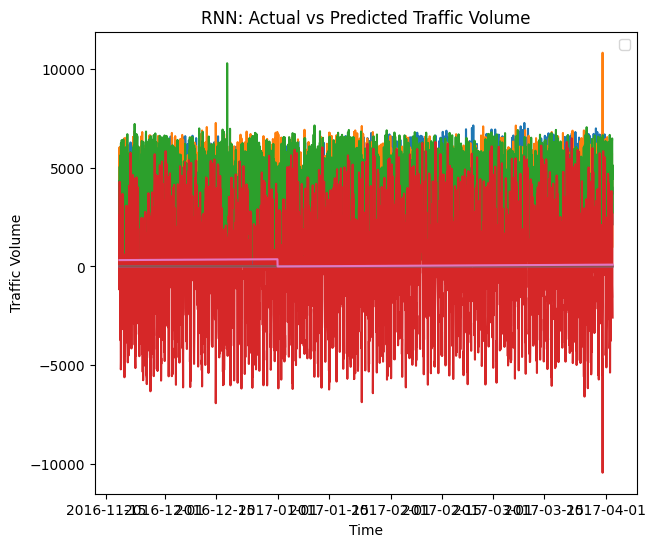

In [297]:
# Plot predicted vs actual values
plt.figure(figsize=(7, 6))
plt.plot(train)
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('RNN: Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()

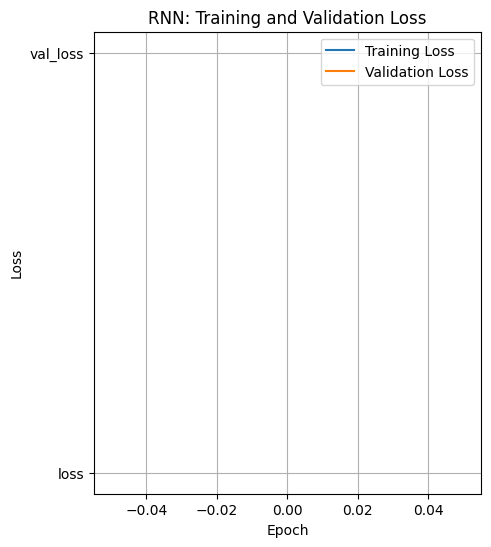

In [298]:
# Plot loss and validation loss
plt.figure(figsize=(5, 6))
plt.plot(['loss'], label='Training Loss')
plt.plot(['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN: Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [282]:
#Build archeticture
model_lstm = Sequential([LSTM(units=100, activation='tanh', return_sequences=True),#1st hidden layer
                    LSTM(units=100, activation='tanh', return_sequences=False), #2nd hidden layer, set return_sequences to False
    Dense(units=7, activation='relu')]) #output

In [283]:
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [284]:
model_lstm.fit(train_X_y, validation_data=val_X_y, epochs=10)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 6941598.5000 - mae: 1703.4857 - val_loss: 7448454.5000 - val_mae: 1765.4663
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 6918995.5000 - mae: 1699.6532 - val_loss: 7434044.5000 - val_mae: 1762.9368
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 6906355.5000 - mae: 1697.5011 - val_loss: 7422897.0000 - val_mae: 1761.1870
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 6895834.5000 - mae: 1695.8033 - val_loss: 7412437.5000 - val_mae: 1759.5664
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 6885826.5000 - mae: 1694.1989 - val_loss: 7402215.5000 - val_mae: 1757.9912
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 6876011.0000 - mae: 1692.6332 - val_loss: 7392185.0000 - val_mae: 1756.4595
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 6866422.0000 - mae: 1691.1074 - val_loss: 7382319.5000 - val_mae: 1754.9503
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - 

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [289]:
lstm_predictions = model_lstm.predict(test_Xy)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [292]:
mse_lstm = mean_squared_error(test_pre_subset, lstm_predictions)
rmse_lstm = np.sqrt(mse_lstm)

print('LSTM MSE:', mse_lstm)
print('LSTM RMSE:', rmse_lstm)


LSTM MSE: 743.8804805192584
LSTM RMSE: 27.27417240759577


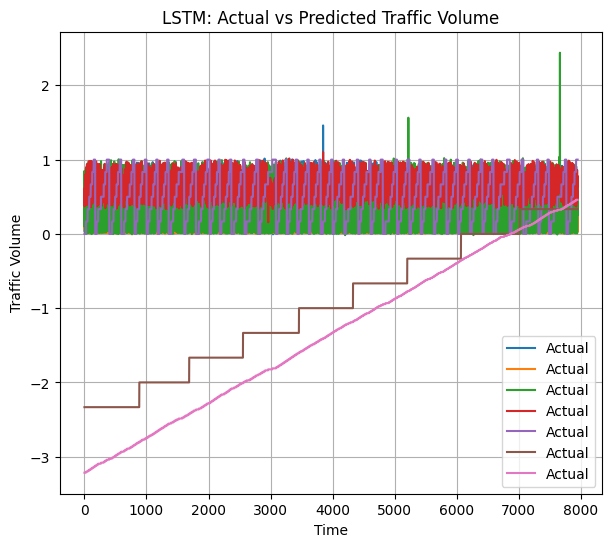

In [293]:
# Plot predicted vs actual values
plt.figure(figsize=(7, 6))
plt.plot(test_pre, label='Actual')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('LSTM: Actual vs Predicted Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: